#Wulan Sabina
#121450150
#Data Mining RA

---

#POST TEST MODUL 3

# Metode PCA dan LDA

## 1. Principal Component Analysis using the PCA implementation in scikit-learn.

In [ ]:
# Import Packages
import matplotlib.pyplot as plt
# Magic command untuk menampilkan plot Matplotlib secara langsung di notebook.
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import Dataset
TT_df = pd.read_csv("HarryPotterTT.csv")
TT_df.head() #Menampilkan 5 data teratas dari TT_df

,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7


In [ ]:
# Eksak Data
y = TT_df.pop('Name').values # Variabel y akan mengambil kolom 'Name' dari DataFrame TT_df
X = TT_df.values # Variabel x akan mengambil seluruh data dari DataFrame TT_df
X_scal = StandardScaler().fit_transform(X) # variabel x_scal akan menstandarisasi data dalam variabel 'X' menggunakan StandardScaler dari scikit-learn

X.shape # Menampilkan dimensi dari X

(22, 5)

In [ ]:
# Apply PCA
# PCAHP akan mengatur jumlah komponen utama yang diinginkan menjadi 4.
pcaHP = PCA(n_components=4)
X_r = pcaHP.fit(X_scal).transform(X_scal) # variabel X_r akan melakukan PCA pada data yang telah di-standarisasi
pcaHP.explained_variance_ratio_  #Menampilkan Variansi Rasio dari PCA

array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ])

In [ ]:
pcaHP.components_ # Menampilkan komponen utama dari PCA

array([[ 0.57407296,  0.40754714,  0.3846298 ,  0.57788956, -0.14983036],
       [ 0.10834723,  0.52231617, -0.44046049,  0.0043925 ,  0.72209553],
       [-0.27762934,  0.33155304,  0.76359223, -0.39624817,  0.27001634],
       [ 0.63573329, -0.55900795,  0.19114024, -0.25378831,  0.42709507]])

(0.0, 0.8)

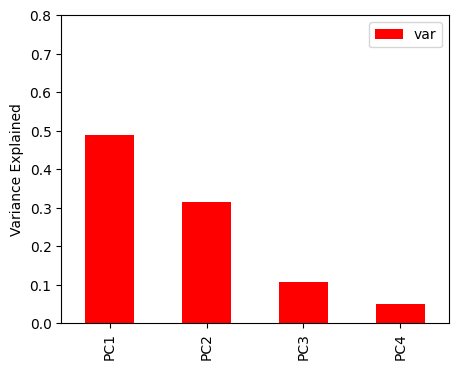

In [ ]:
# Plot ke 4
# Membuat DataFrame dengan varians di setiap komponen utama
df = pd.DataFrame(pcaHP.explained_variance_ratio_,
                  index = ['PC1','PC2','PC3','PC4'], columns = ['var'])

pl = df.plot.bar(color='red', figsize= (5,4)) # Membuat bar plot
pl.set_ylabel("Variance Explained") # Mengatur label sumbu Y pada bar plot
pl.set_ylim([0, 0.8]) # Mengatur skala sumbu Y pada bar plot

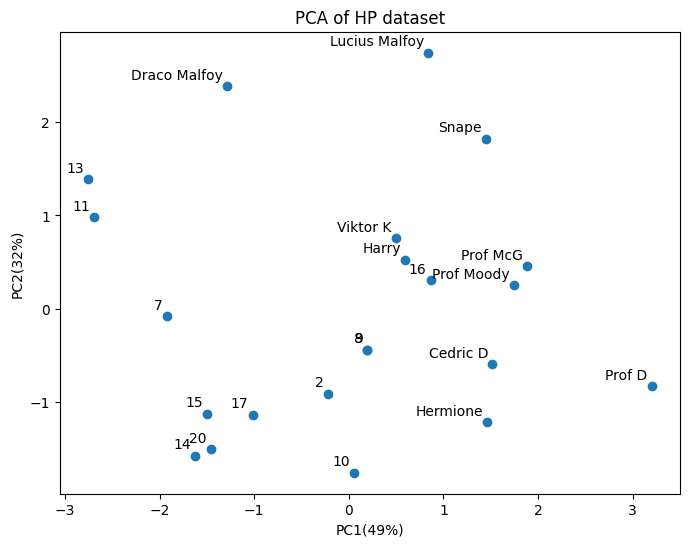

In [ ]:
# Persebaran Data PC1 dan PC 2
plt.figure(figsize=(8,6)) #Membuat figure dengan ukuran 8,6
lw = 2 #Menentukan lebar garis plot
labels = list(range(len(y))) # Membuat variabel labels untuk setiap titik data yang akan diplot

# Mengganti label dengan nama karakter di Harry Potter
labels[0]='Harry'
labels[1]='Hermione'
labels[3]='Prof D'
labels[5]='Prof McG'
labels[6]='Prof Moody'
labels[18]='Cedric D'
labels[19]='Viktor K'
labels[21]='Lucius Malfoy'
labels[4]='Snape'
labels[12]='Draco Malfoy'

plt.scatter(X_r[:, 0], X_r[:, 1]) # Membuat scatter plot dengan sumbu X menggunakan PC1 dan sumbu Y menggunakan PC2

for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]):
  plt.annotate(label, xy=(xi, yi), xytext=(-3,3),
               textcoords = 'offset points', ha='right', va='bottom')

plt.xlabel('PC1(49%)')
plt.ylabel('PC2(32%)')
plt.title('PCA of HP dataset')

plt.show()

> Plot ini menunjukkan data yang diproyeksikan ke 2 PC pertama. PC ini
menyumbang 81% varian data. Dapat dikatakan bahwa PC pertama
mencerminkan competence dan PC kedua mewakili malevolence.

## 2. Linear Discriminant Analysis using the LDA implementation in scikit-learn.

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import Dataset
# Membaca dataset 'penguins.csv' dan mengatur kolom pertama sebagai judul
penguins_df = pd.read_csv('penguins.csv', index_col = 0)
# Variabel y digunakan untuk mengambil kolom 'species' sebagai
y = penguins_df.pop('species').values
# Mengambil semua kolom selain 'species' untuk x_raw
X_raw = penguins_df.values

# Data train dan Data Test dibagi dengan Test adalah 50% atau 1/2
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split( X_raw,
                                                        y, random_state=1,
                                                        test_size=1/2)

scaler = StandardScaler() # Melakukan Standarisasi
X_train = scaler.fit_transform(X_tr_raw) # Standarisasi untuk Data Train
X_test = scaler.transform(X_ts_raw) # Standarisasi untuk Data Test

feature_names = penguins_df.columns # variabel feature_names akan memasukkan kolom kolom dari dataset penguin
print(penguins_df.shape) # Menampilkan bentuk dimensi nya
penguins_df.head() # Menampilkan 5 data teratas

(333, 4)


,bill_length,bill_depth,flipper_length,body_mass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [ ]:
# Menampilkan data y

types = list(Counter(y).keys()) # Counter digunakan untuk  menghitung kemunculan dalam variabel 'y'.
# menampilkan variabel types akan menampilkan daftar jenis yang ada di variabel y
types

['Adelie', 'Gentoo', 'Chinstrap']

In [ ]:
# Apply LDA
# Membuat objek LDA (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis()
# Melatih model LDA pada Data Train
lda.fit(X_train, y_train)
# Mengubah data pelatihan ke dalam dimensi yang lebih rendah menggunakan LDA
X_tr_lda = lda.transform(X_train)
# akan menampilkan bentuk dimensi dari X_tr LDA
X_tr_lda.shape

(166, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

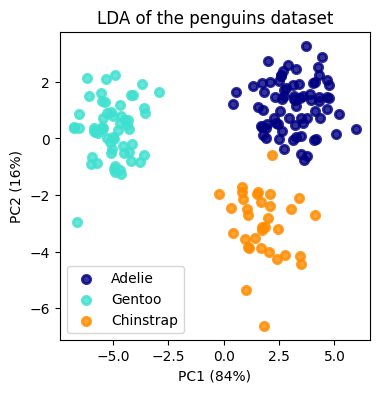

In [ ]:
# Plot LDA
# Membuat figure dengan ukuran (4,4)
plt.figure(figsize=(4,4))
# Menambahkan warna
colors = ['navy','turquoise','darkorange']
#lebar garis pada plot
lw = 2

# Scatter Plot setiap jenis dalam types
for color, target_name in zip(colors, types):
  plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
              color = color, alpha =.8, lw=lw, label= target_name)

# Menambahkana legend, label dan menampilkan scatter plot
plt.legend(loc='best',shadow=False, scatterpoints=1)
plt.xlabel('PC1 (84%)')
plt.ylabel('PC2 (16%)')
plt.title('LDA of the penguins dataset')
plt.show

In [ ]:
# Hitung Akurasi
y_pred = lda.predict(X_test)
accuracy_score(y_pred,y_test)

0.9700598802395209

In [ ]:
#Penggunaan PCA
pca = PCA(n_components = 4)
X_tr_pca = pca.fit(X_train).transform(X_train)

#Proportion of variance
pca.explained_variance_ratio_

array([0.67991833, 0.20387145, 0.08721252, 0.0289977 ])

<function matplotlib.pyplot.show(close=None, block=None)>

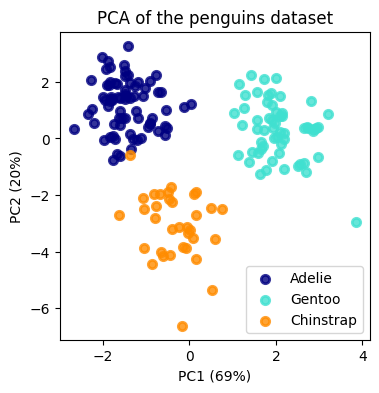

In [ ]:
# Plot PCA untuk perbandingan
plt.figure(figsize=(4,4))
lw = 2

for color, target_name in zip(colors, types):
  plt.scatter(X_tr_pca[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
              color = color, alpha =.8, lw=lw, label= target_name)

plt.legend(loc='best',shadow=False, scatterpoints=1)
plt.xlabel('PC1 (69%)')
plt.ylabel('PC2 (20%)')
plt.title('PCA of the penguins dataset')
plt.show

# Metode Filter

## 1. Feature Selection
Metode filter digunakan dengan mengimpletasikan teorema Chi square statistic dan
Information Gain.

In [ ]:
#Import Packages
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
#Import Dataset
seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
#Menghitung data pada variabel target yaitu class
seg_data['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [ ]:
# Split Data
y = seg_data.pop('Class').values
X_raw = seg_data.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=1, test_size=1/2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = seg_data.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [ ]:
#Feature Chi Square Scores
chi2_score, pval = chi2(X_train, y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score

array([ 14.99569813, 114.86161054,   0.        ,  13.47060858,
        27.33137409,  14.52455789,  20.00650221,  17.74732567,
        15.4768292 , 293.4360061 , 290.96380025, 303.47783064,
       290.11739498,  54.25395182, 111.01924229,  92.91780859,
       287.66891553,  81.64654774, 268.86221356])

In [ ]:
#Feature I-Gain Scores
i_scores = mutual_info_classif(X_train, y_train)
i_scores

array([0.1347588 , 0.94966773, 0.        , 0.01283508, 0.        ,
       0.48358086, 0.32048243, 0.46195377, 0.36203549, 1.16300243,
       1.21531809, 1.10280758, 1.13806537, 0.77460132, 0.91460055,
       0.96645879, 1.1360129 , 0.92738433, 1.1296683 ])

In [ ]:
#Simpan Score
df = pd.DataFrame({'Mutual Info.' : i_scores, 'Chi Square': chi2_score, 'Feature':feature_names})
df.set_index('Feature',inplace= True)
df.sort_values('Mutual Info.',inplace = True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
RAWRED-MEAN,1.215318,290.963800
INTENSITY-MEAN,1.163002,293.436006
RAWGREEN-MEAN,1.138065,290.117395
VALUE-MEAN,1.136013,287.668916
HUE-MEAN,1.129668,268.862214
RAWBLUE-MEAN,1.102808,303.477831
EXGREEN-MEAN,0.966459,92.917809
REGION-CENTROID-ROW,0.949668,114.861611
SATURATION-MEAN,0.927384,81.646548


<bound method Axes.plot of <Axes: >>

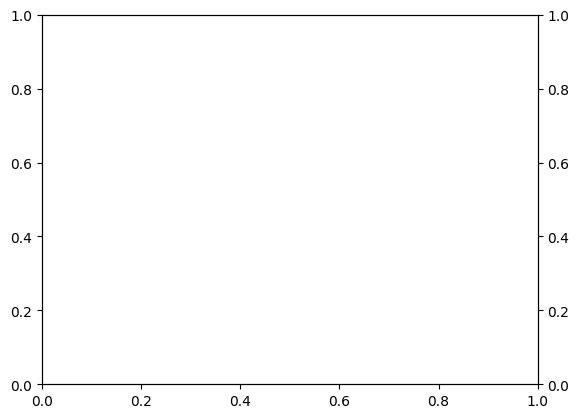

In [ ]:
# Plotting Th eFilter Score
fig, ax = plt.subplots()
rr = range(0, len(feature_names))
ax2 = ax.twinx()
ax.plot

In [ ]:
#Hitung Korelasi
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.8977622628188181, pvalue=1.855951347275327e-07)

## 2. Correlation Based Feature Selection (CFS)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib.ticker import MaxNLocator

In [ ]:
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
y = seg_data.pop('Class').values
X_raw = seg_data.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 0.946
Hold Out testing all features: 0.940


### Forward Search

In [ ]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.43951449 0.44021037]
Selected Feature index: (17, 18)


In [ ]:
# Print the selected features
feature_names_sel = seg_data.columns[np.array(sel_comb)]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN'], dtype='object')

In [ ]:
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.874
Hold Out testing selected features: 0.847


### Best First Search

In [ ]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([17, 18,  8,  6, 10,  9])

In [ ]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN', 'HEDGE-SD', 'VEDGE-SD', 'RAWRED-MEAN',
       'INTENSITY-MEAN'],
      dtype='object')

In [ ]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.43951448818147326,
 0.44021037374992716,
 0.43767125770380755,
 0.43619307358905546,
 0.43539938594841915,
 0.4339188253042891]

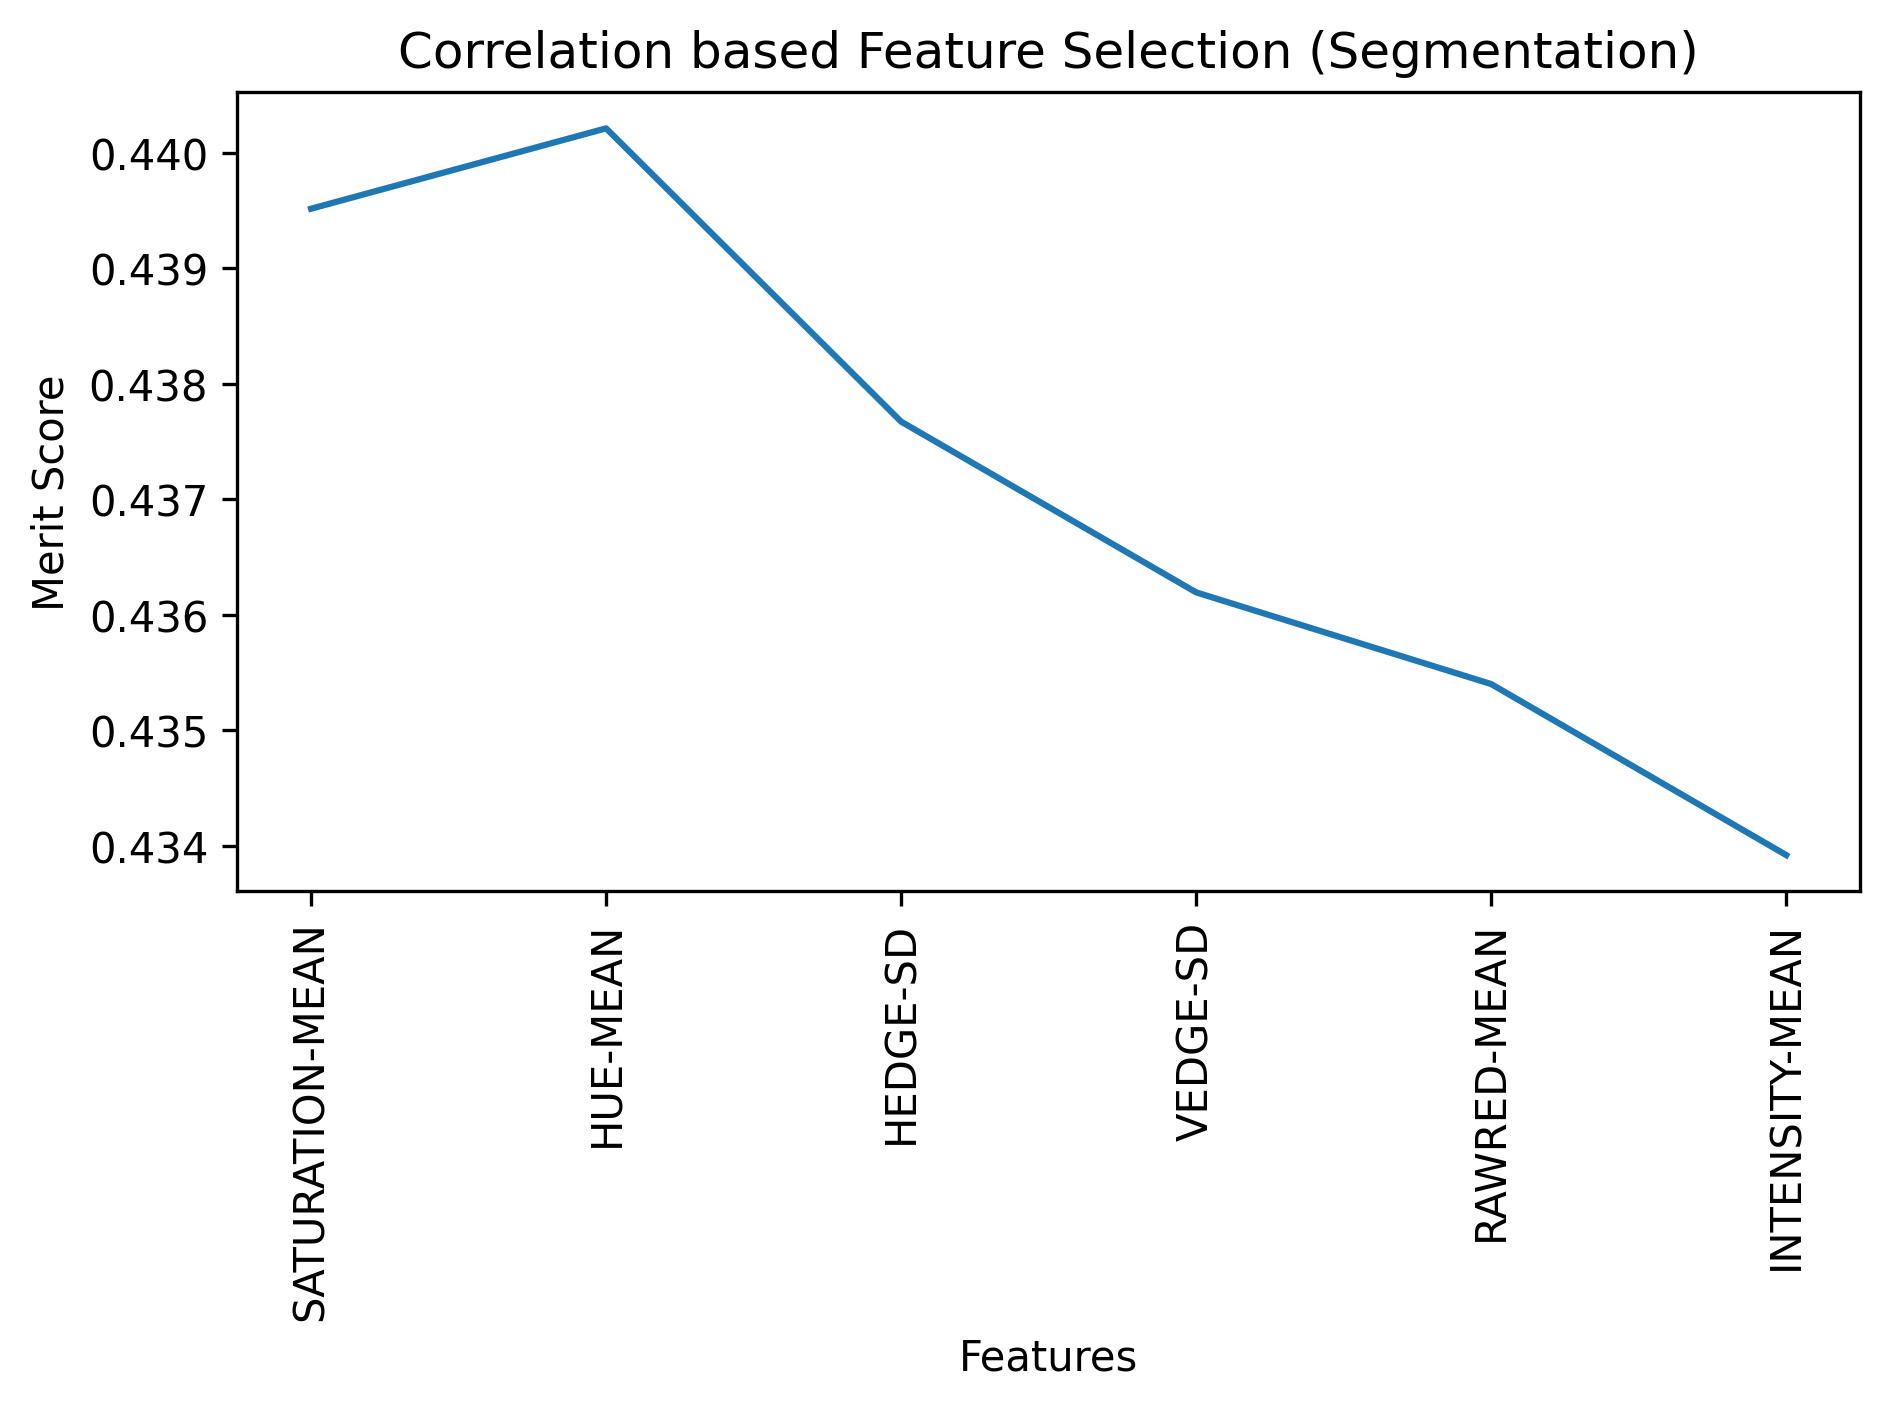

In [ ]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300)
plt.plot(feature_names_sel, merit)
plt.title("Correlation based Feature Selection (Segmentation)")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Merit Score")
plt.tight_layout()

In [ ]:
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 0.900
Hold Out testing selected features: 0.887


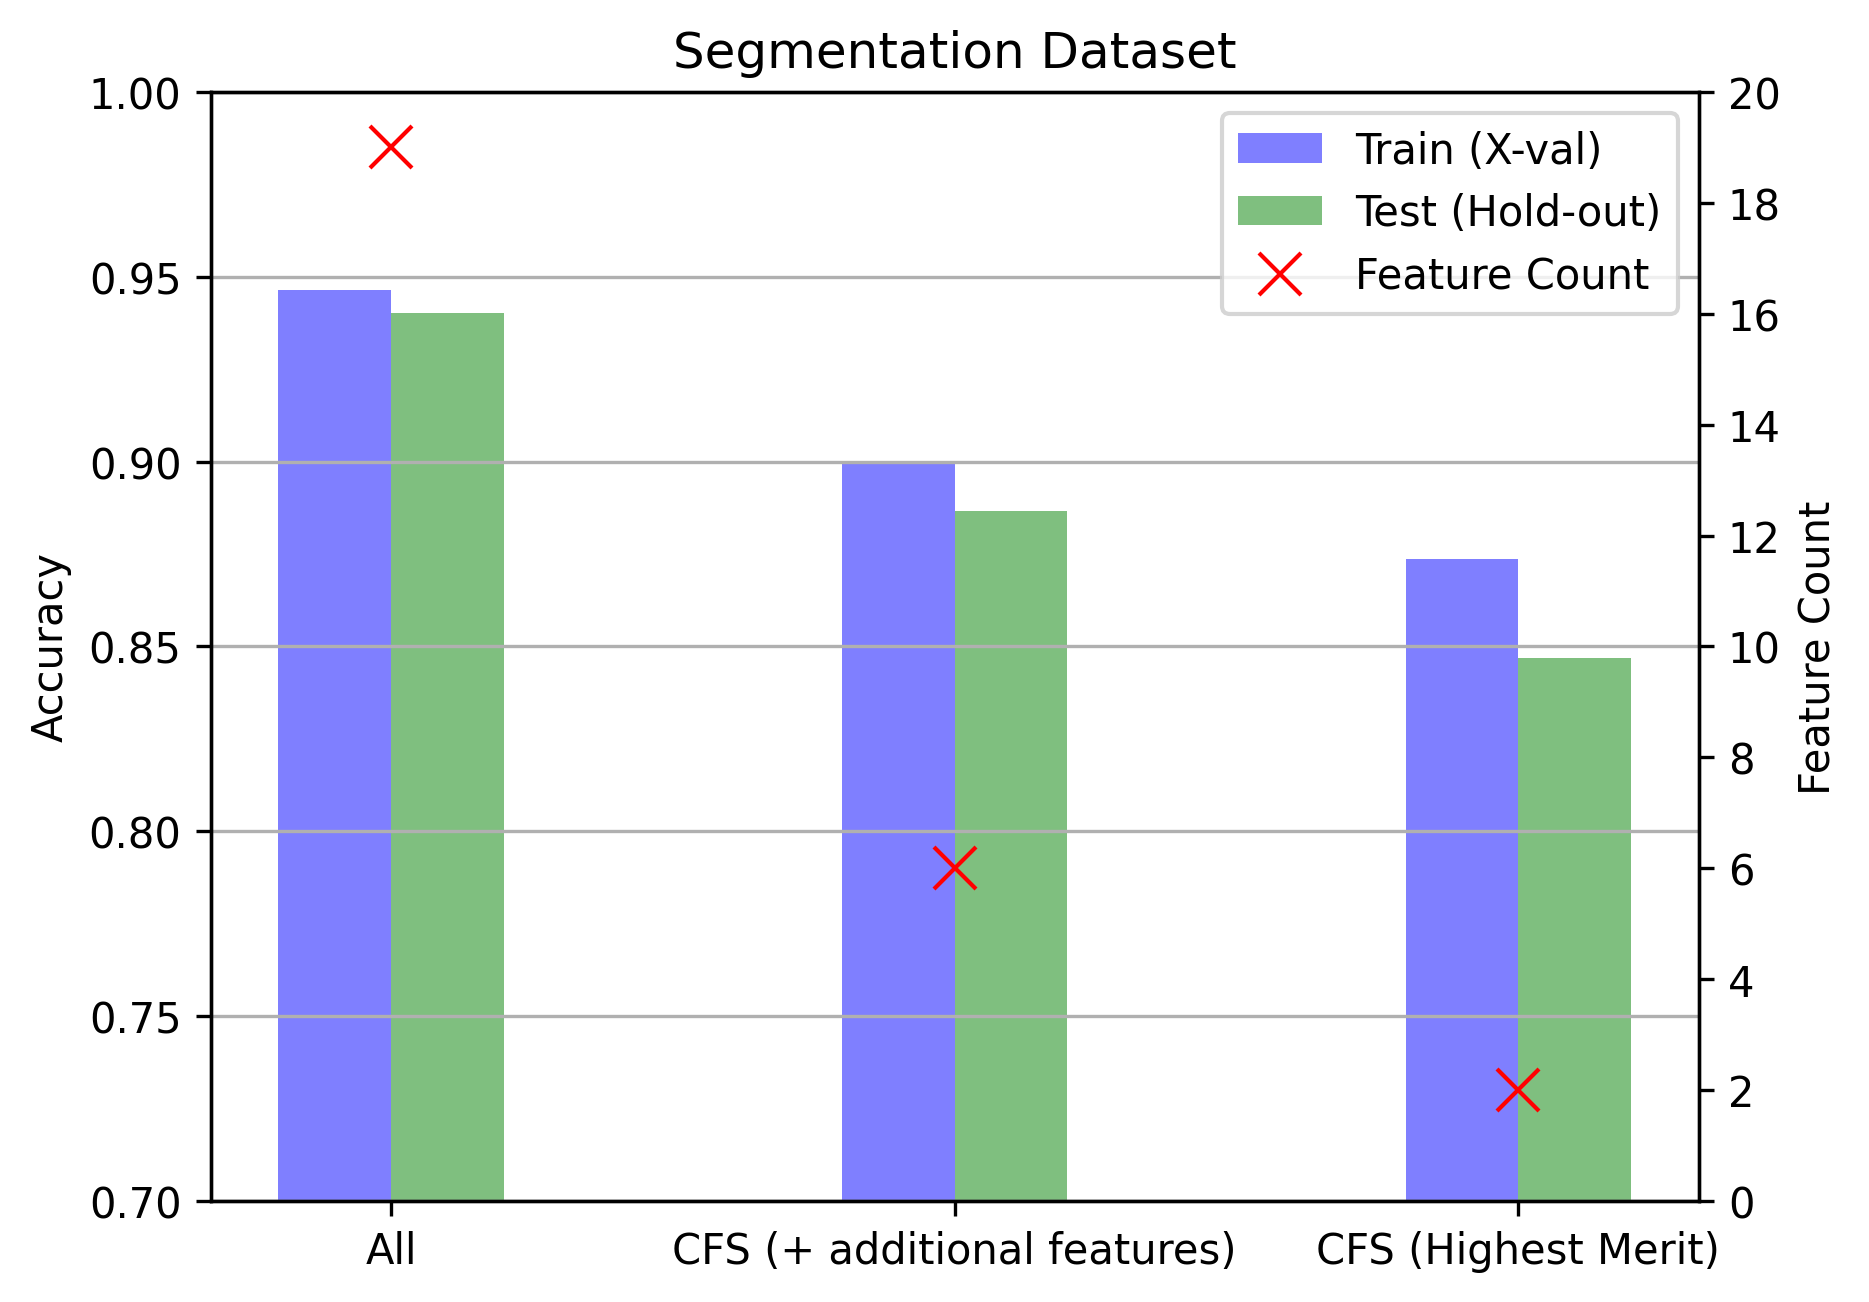

In [ ]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("Segmentation Dataset")
plt.show()

# Metode Embedded (D-Tree)
Pemilihan fitur tersirat dalam konstruksi pohon keputusan (decision tree) karena
biasanya tidak semua fitur akan muncul.

In [ ]:
#import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
#import dataset
penguins_df = pd.read_csv('penguins.csv',index_col = 0)

feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()

(333, 5)


,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,36.7,19.3,193.0,3450.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie


In [ ]:
#Hitung data pada variabel target
penguins_df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
#Array
y = penguins_df.pop('species').values
X = penguins_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=1/2)

feature_names = penguins_df.columns
X_train.shape, X_test.shape

((166, 4), (167, 4))

In [ ]:
# Full Tree
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc= accuracy_score(y_pred, y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.93


[Text(0.6, 0.9, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.7, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.3, 0.5, 'bill_depth <= 16.65\n75\n[74, 1, 0]\nAdelie'),
 Text(0.2, 0.3, 'bill_length <= 39.5\n8\n[7, 1, 0]\nAdelie'),
 Text(0.1, 0.1, '7\n[7, 0, 0]\nAdelie'),
 Text(0.3, 0.1, '1\n[0, 1, 0]\nGentoo'),
 Text(0.4, 0.3, '67\n[67, 0, 0]\nAdelie'),
 Text(0.5, 0.5, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.7, 'bill_depth <= 18.4\n63\n[0, 5, 58]\nChinstrap'),
 Text(0.7, 0.5, '58\n[0, 0, 58]\nChinstrap'),
 Text(0.9, 0.5, '5\n[0, 5, 0]\nGentoo')]

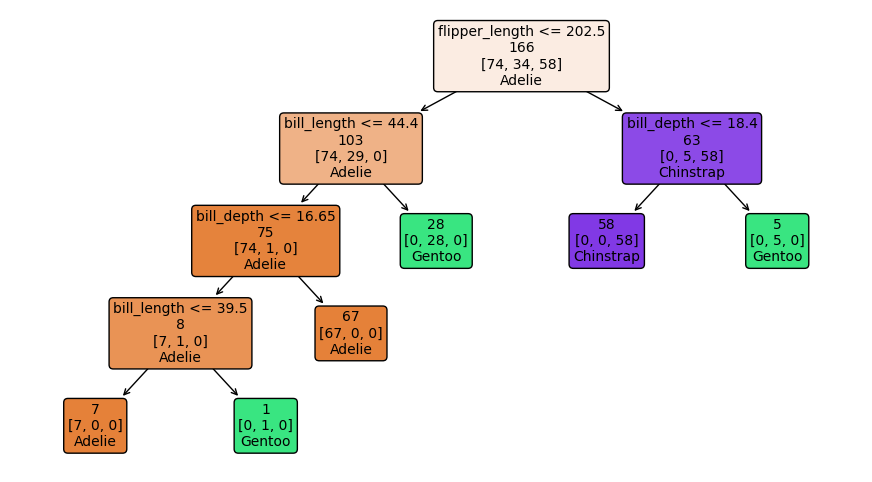

In [ ]:
plt.figure(figsize=(11,6))
tree.plot_tree(ftree, fontsize = 10, feature_names = feature_names,
                class_names=['Adelie','Gentoo','Chinstrap'], label = 'none',
                filled = True, impurity = False,
                rounded = True)

In [ ]:
fi = ftree.feature_importances_

for fi_val, f_name in zip(fi, feature_names):
  print("%4.2f %s" % (fi_val, f_name))

0.34 bill_length
0.11 bill_depth
0.55 flipper_length
0.00 body_mass


In [ ]:
ftree.get_n_leaves()

6

In [ ]:
#Pruned Tree
#Nilai Akurasi
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 3)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.89


[Text(0.6, 0.8333333333333334, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.5, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.2, 0.16666666666666666, '75\n[74, 1, 0]\nAdelie'),
 Text(0.6, 0.16666666666666666, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.5, '63\n[0, 5, 58]\nChinstrap')]

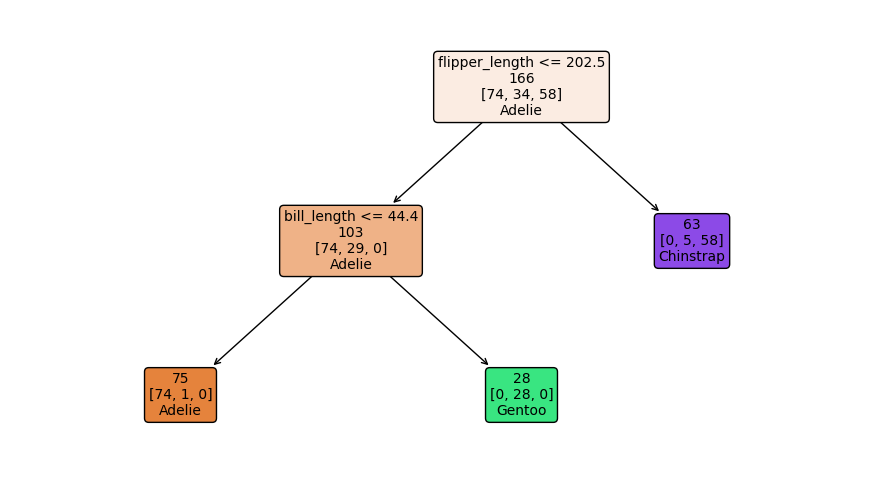

In [ ]:
#Plot D-Tree
plt.figure(figsize=(11,6))

tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
               class_names=['Adelie','Gentoo','Chinstrap'], label = 'none',
                filled = True, impurity = False,
                rounded = True)

In [ ]:
#Penting
fi = p_tree.feature_importances_
for fi_val, f_name in zip(fi,feature_names):
  print(" %4.2f %s" % (fi_val, f_name))

 0.37 bill_length
 0.00 bill_depth
 0.63 flipper_length
 0.00 body_mass


# Permutation Feature Importance and Wrapper

## 1. Permutation Feature Importance

In [ ]:
#import packages
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Import Dataset
col_heads = [str(x) for x in range(34)]
col_heads.append('Class')
ion_data = pd.read_csv('ionosphere.csv', names = col_heads, na_values='?', header = None)
ion_data.dropna(axis = 0, inplace = True)
print(ion_data.shape)
ion_data.head()

(351, 35)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
# Split Data
y = ion_data.pop('Class').values
X = ion_data
ion_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = ion_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state=2, test_size = 1/2)

In [ ]:
#Final Result
res_df = pd.DataFrame([['All Features', 0.0,0.0],
                       ['After PI',0.0,0.0],
                       ['After Wrapper',0.0,0.0]],columns=['Method','X-Val','Hold-Out'])
res_df.set_index('Method', inplace = True)

In [ ]:
#Akurasi
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN = kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred, y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv= 8)

res_df.loc['All Features']['X-Val']=cv_acc.mean()
res_df.loc['All Features']['Hold-Out']=acc

print("X-val on training all features: {0:.3f}". format(cv_acc.mean()))
print("Hold-out on testing all features: {0:.3f}". format(acc))

X-val on training all features: 0.818
Hold-out on testing all features: 0.795


In [ ]:
#menampilkan permutation importance

knn_perm = permutation_importance(kNN,X_train,y_train,n_repeats=10,random_state = 0)

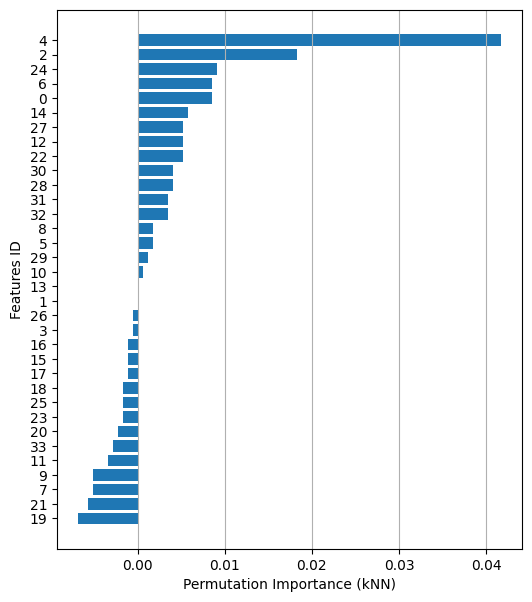

In [ ]:
sorted_idx = knn_perm.importances_mean.argsort()
fig,ax = plt.subplots(figsize=(6,7))
ax.barh(ion_data.columns[sorted_idx],knn_perm.importances_mean[sorted_idx],zorder=1)
ax.xaxis.grid(True)
ax.set_ylabel("Features ID")
ax.set_xlabel("Permutation Importance (kNN)");
ax.figure.savefig("PIscores.png")

In [ ]:
#buat mask

mask = knn_perm.importances_mean[sorted_idx]>0

In [ ]:
PI_features = ion_data.columns[sorted_idx][mask]

In [ ]:
X_PI = X[PI_features]
print("Permutation Importance select",X_PI.shape[1],"features.")
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)
X_PI_train,X_PI_test,y_PI_train,y_PI_test = train_test_split(X_PI_scaled, y , random_state = 2, test_size = 1/2)

Permutation Importance select 18 features.


In [ ]:
#akurasi
kNNPI = KNeighborsClassifier(n_neighbors=3)
kNNPI = kNN.fit(X_PI_train,y_PI_train)
y_pred_PI = kNN.predict(X_PI_test)
acc_PI = accuracy_score(y_pred_PI,y_test)
cv_acc_PI = cross_val_score(kNNPI,X_PI_train,y_train,cv=8)

res_df.loc['All Features']['X-Val'] = cv_acc_PI.mean()
res_df.loc['All Features']['Hold-Out'] = acc_PI

print("X_Val on training all features: {0:.3f}".format(cv_acc_PI.mean()))
print("Hold-Out testinng all features: {0:.3f}".format(acc_PI))

X_Val on training all features: 0.880
Hold-Out testinng all features: 0.847


## Wrapper Stage

In [ ]:
#wrapper dengan feature backward elimination

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
sfs = SequentialFeatureSelector(knn,n_features_to_select="auto",direction ="backward", cv = 10, tol = 0.00001)

sfs.fit(X_PI_train,y_train)
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test = sfs.transform(X_PI_test)

knnPIW= KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)
knnPIW.score(X_PI_W_test,y_PI_test)

(175, 16)


0.8465909090909091

In [ ]:
#akurasi
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW .fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)

y_pred_PIW = knnPIW .predict(X_PI_W_test)
acc_PIW = accuracy_score(y_pred_PIW,y_PI_test)
cv_acc_PIW = cross_val_score(knnPIW,X_PI_W_train,y_train,cv=8)

res_df.loc['After Wrapper']['X-Val'] = cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out'] = acc_PIW

print("X_Val on training all features: {0:.3f}".format(cv_acc_PIW.mean()))
print("Hold-Out testinng all features: {0:.3f}".format(acc_PIW))

(175, 16)
X_Val on training all features: 0.897
Hold-Out testinng all features: 0.847


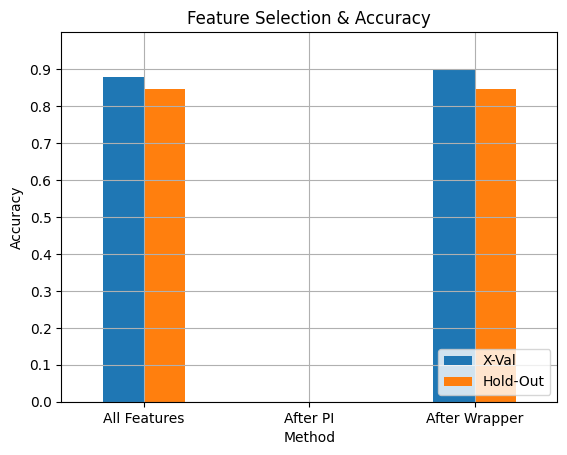

In [ ]:
ax = res_df.plot.bar(rot=0)
ax.set_ylabel("Accuracy")
ax.set_title("Feature Selection & Accuracy")
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1,0.1))
ax.legend(loc = "lower right")
ax.grid(True)
ax.figure.savefig("PI+Wrapper.png")

# B. Rangkum hasil dan analisis yang ada pada praktikum 1 dan jelaskan perbedaan kedua metode tersebut yaitu PCA dan LDA!

> **Analisis:**  

>Hasil PCA pada Dataset Penguins
Dalam plot PCA pada dataset penguins, terlihat bahwa terdapat dua kelompok kelas, yaitu Adelia dan Chinstrap, yang berdekatan dan terpusat di sekitar sumbu PC2 dengan koordinat sekitar (-2, 2). Sementara itu, kelas Gentoo terletak jauh dari kedua kelompok tersebut dan terfokus di sepanjang sumbu PC1 dengan koordinat sekitar (2, 1). Hal ini disebabkan oleh adanya perbedaan dalam fitur fisik yang terukur pada dataset. PCA bekerja dengan cara mengidentifikasi pola variabilitas dalam data. \\

> Hasil LDA pada Dataset Penguins
Dalam plot LDA pada dataset penguins, terlihat bahwa kelas Gentoo terletak di sepanjang sumbu PC2 dengan koordinat sekitar (-5.0, 2), sementara kelas Adelia dan Chinstrap terletak di sepanjang sumbu PC1 yang membentang naik ke arah sumbu PC2 dengan koordinat sekitar (2.5, 2). Berbeda dengan PCA, pada metode LDA, kedua kelas tersebut terpisah dengan jelas. Ini disebabkan oleh fakta bahwa LDA secara eksplisit mempertimbangkan informasi kelas ketika melakukan reduksi dimensi. LDA mencari proyeksi dalam data yang memaksimalkan jarak antara pusat-pusat massa kelas sambil meminimalkan variasi dalam kelas. \\

> Perbedaan Antara PCA dan LDA
\

> PCA tidak mempertimbangkan informasi kelas ketika melakukan reduksi dimensi, sehingga pemisahan kelas tidak terlihat jelas. Biasanya, hasil PCA mencerminkan variasi terbesar dalam data tanpa memperhatikan perbedaan kelas. \\

> LDA secara eksplisit mempertimbangkan informasi kelas saat melakukan reduksi dimensi, sehingga pemisahan kelas lebih baik terutama ketika terdapat perbedaan signifikan antar kelas dalam data.

# C.  Dengan dataset penguins.csv gunakan model Filters dan Correlation Based Feature Selection (CFS). Kemudian rangkum hasil dan lakukan analisis!.

## Model Filter

In [ ]:
#import package
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
datawulan = pd.read_csv("penguins.csv")
print(datawulan.shape)
datawulan.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [ ]:
datawulan["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
y = datawulan.pop("species").values
X_raw = datawulan.values

X_tr_raw,X_ts_raw,y_train,y_test = train_test_split(X_raw,y,random_state = 1, test_size=1/2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = datawulan.columns
X_train.shape,X_test.shape

((166, 5), (167, 5))

In [ ]:
#feature scores
chi2_score,pval = chi2(X_train,y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score

array([23.27831336, 12.33320189, 13.04056372, 15.91528968, 13.39467176])

In [ ]:
#i score
i_scores = mutual_info_classif(X_train,y_train)
i_scores

array([1.04241997, 0.61787542, 0.5045198 , 0.6018556 , 0.53884032])

In [ ]:
#simpan score
df = pd.DataFrame({'Mutual Info.':i_scores, 'Chi Square':chi2_score, 'Feature':feature_names})
df.set_index('Feature', inplace=True)
df.sort_values('Mutual Info.', inplace=True, ascending=False)
df

,Mutual Info.,Chi Square
Feature,,
Unnamed: 0,1.042420,23.278313
bill_length,0.617875,12.333202
flipper_length,0.601856,15.915290
body_mass,0.538840,13.394672
bill_depth,0.504520,13.040564


## CFS

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

In [ ]:
datawulan = pd.read_csv('penguins.csv')
print(datawulan.shape)
datawulan.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [ ]:
y = datawulan.pop('species').values
X_raw = datawulan.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((166, 5), (167, 5))

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 1.000
Hold Out testing all features: 1.000


## FS

In [ ]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.34053677 0.34140439]
Selected Feature index: (0, 3)


In [ ]:
# Print the selected features
feature_names_sel = datawulan.columns[np.array(sel_comb)]
feature_names_sel

Index(['Unnamed: 0', 'flipper_length'], dtype='object')

In [ ]:
#Evaluate
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.988
Hold Out testing selected features: 1.000


## BFS

In [ ]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([0, 3, 1, 2, 4])

In [ ]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.3405367650586217,
 0.34140438602544737,
 0.34135154379629856,
 0.3315979801428004,
 0.3247704646387883]

In [ ]:
#Evaluate
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 1.000
Hold Out testing selected features: 1.000


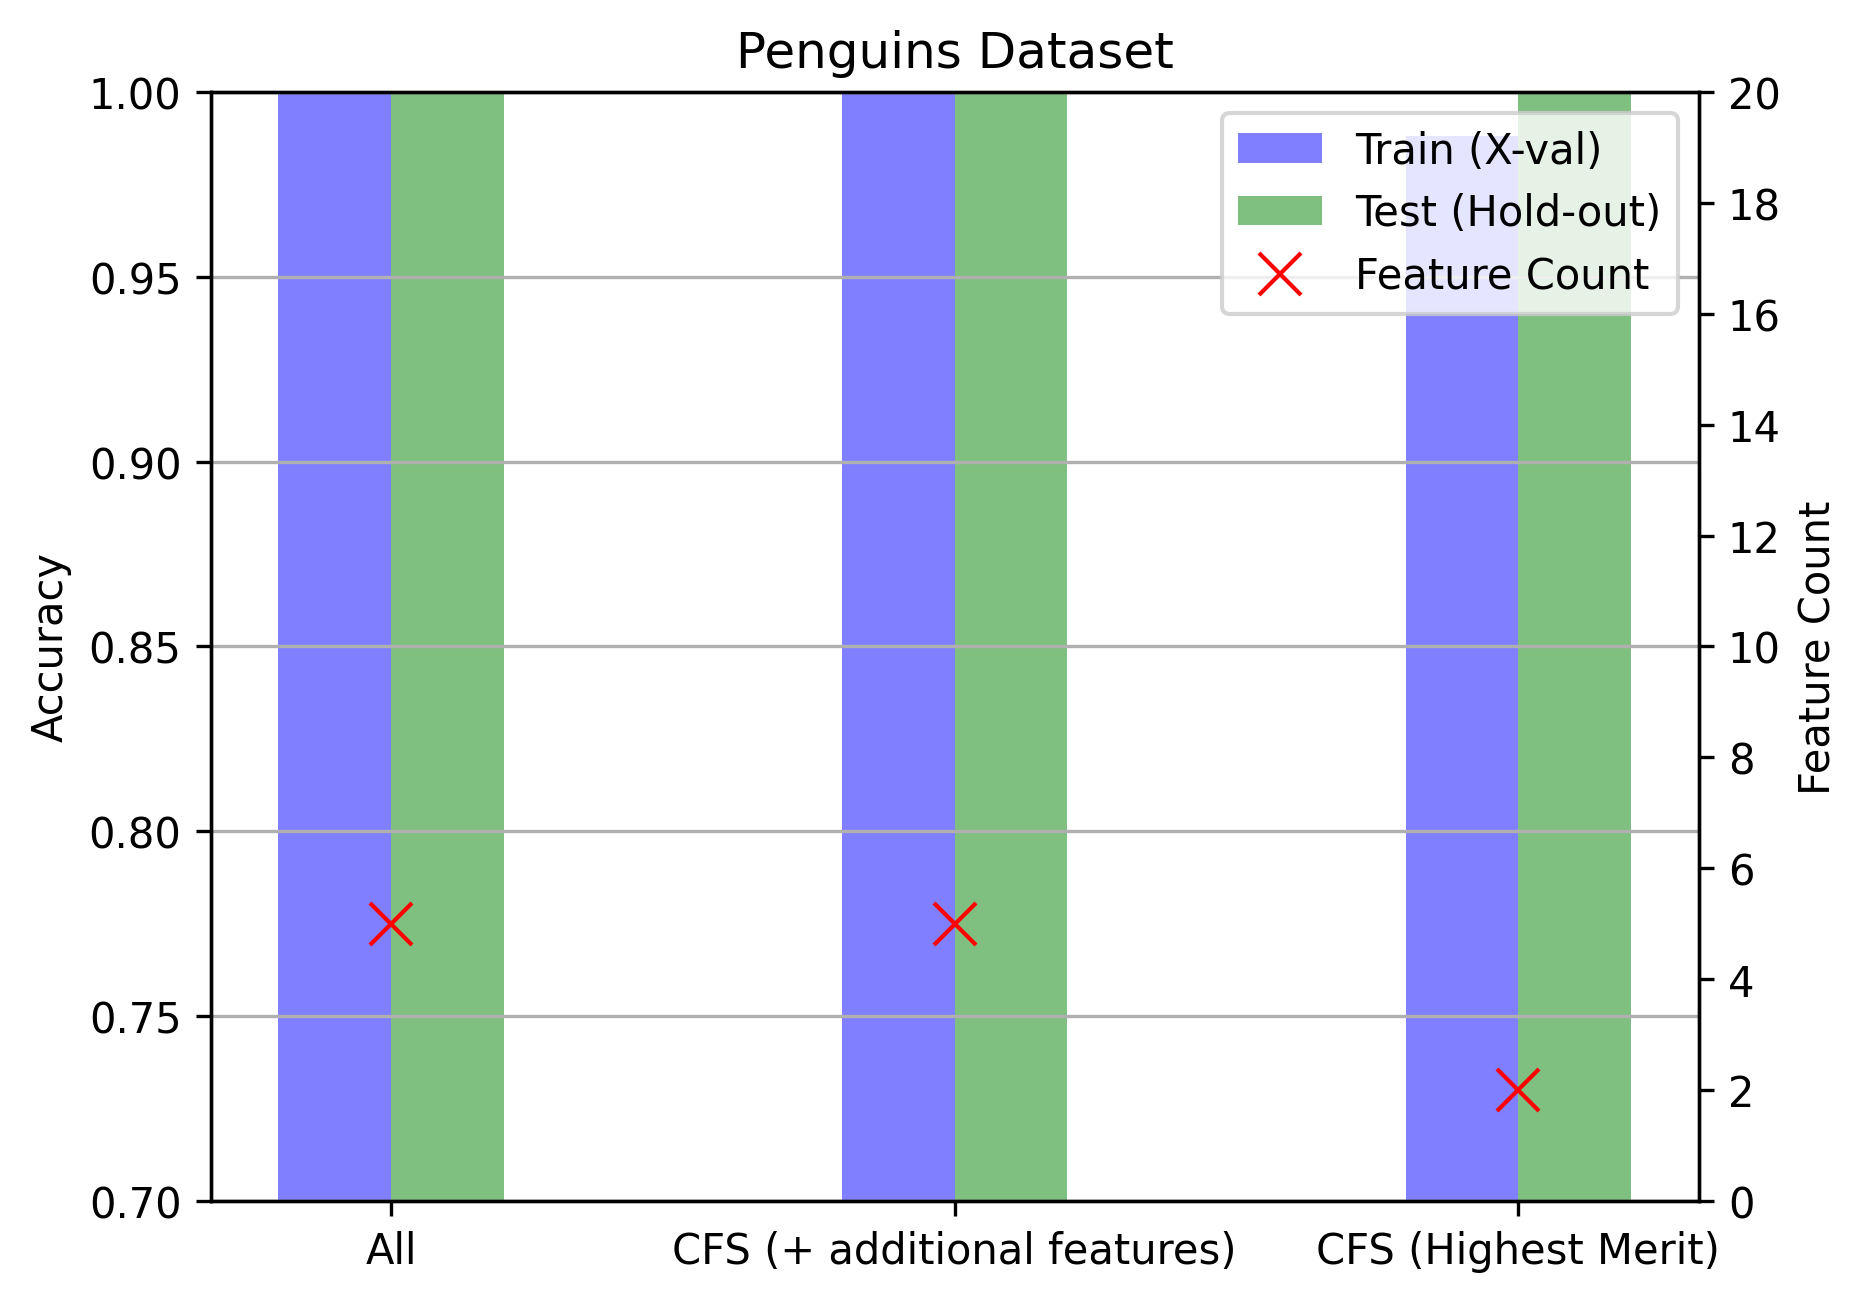

In [ ]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("Penguins Dataset")
plt.show()

> **Analisis:**

>Data awal terdiri dari 333 baris dan 6 kolom, termasuk kolom target "species".
Data dibagi menjadi data latihan dan data uji dengan perbandingan 50%:50%.\\

> Lalu, dilakukan dua jenis seleksi fitur: Chi-Squared dan Mutual Information.
Hasilnya menunjukkan skor Chi-Squared dan Mutual Information untuk masing-masing fitur.
Fitur "Unnamed:0" memiliki skor tertinggi dalam Mutual Information, sedangkan "bill_length" memiliki skor tertinggi dalam Chi-Squared. \\

> Untuk model klasifikasi kita menggunakan model K-Nearest Neighbors (KKN) dengan 5 tetangga terdekat.
Model awal dijalankan dengan semua fitur, dan mencapai akurasi 100% pada pengujian data uji. \\

> Metode CFS digunakan untuk memilih fitur yang memiliki korelasi tinggi dengan target.
Hanya dua fitur yang dipilih, yaitu "Unnamed:0" dan "flipper_length," dengan merit score tertinggi. Model KNN dijalankan kembali hanya dengan dua fitur yang dipilih, dan tetap mencapai akurasi 100% pada pengujian data uji.\\

> Meskipun model awal menggunakan semua fitur dan mencapai akurasi 100%, pemilihan fitur CFS menghasilkan performa model yang sama baik bahkan dengan hanya dua fitur. Ini menunjukkan bahwa fitur yang dipilih sangat relevan untuk klasifikasi. Kesimpulannya, pemilihan fitur yang cerdas dapat mengurangi dimensi data dan mempertahankan performa model. Namun, perlu dilakukan uji lebih lanjut pada dataset yang lebih kompleks atau dalam kasus penggunaan yang lebih realistis.

# D. Dengan dataset segmentasi gunakan model decison tree. Kemudian rangkum hasil dan lakukan analisis!.

In [ ]:
#import package
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
seg_data = pd.read_csv("segmentation-all.csv")

features_names = seg_data.columns
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
seg_data["Class"].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [ ]:
y = seg_data.pop("Class").values
X = seg_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=1/2)

feature_names = seg_data.columns
X_train.shape,X_test.shape

((1155, 19), (1155, 19))

In [ ]:
#full tree
ftree = DecisionTreeClassifier(criterion = 'entropy')
ftree = ftree.fit(X_train,y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print("Test Set Accuract %4.2f"% (acc))

Test Set Accuract 0.95


[Text(0.7732405462184874, 0.9583333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.6137079831932774, 0.875, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.3954831932773109, 0.7916666666666666, 'HUE-MEAN <= -1.838\n485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.13550420168067226, 0.7083333333333334, 'HUE-MEAN <= -2.224\n308\n[3, 20, 144, 0, 0, 0, 141]\nFOLIAGE'),
 Text(0.05042016806722689, 0.625, 'SATURATION-MEAN <= 0.478\n82\n[0, 1, 79, 0, 0, 0, 2]\nFOLIAGE'),
 Text(0.03361344537815126, 0.5416666666666666, 'RAWBLUE-MEAN <= 36.833\n3\n[0, 1, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.01680672268907563, 0.4583333333333333, '2\n[0, 0, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.05042016806722689, 0.4583333333333333, '1\n[0, 1, 0, 0, 0, 0, 0]\nSKY'),
 Text(0.06722689075630252, 0.5416666666666666, '79\n[0, 0, 79, 0, 0, 0, 0]\nFOLIAGE'),
 Text(0.22058823529411764, 0.625, 'RAWRED-MEAN <= 2.611\n226\n[3, 19, 65, 0, 0, 0, 139

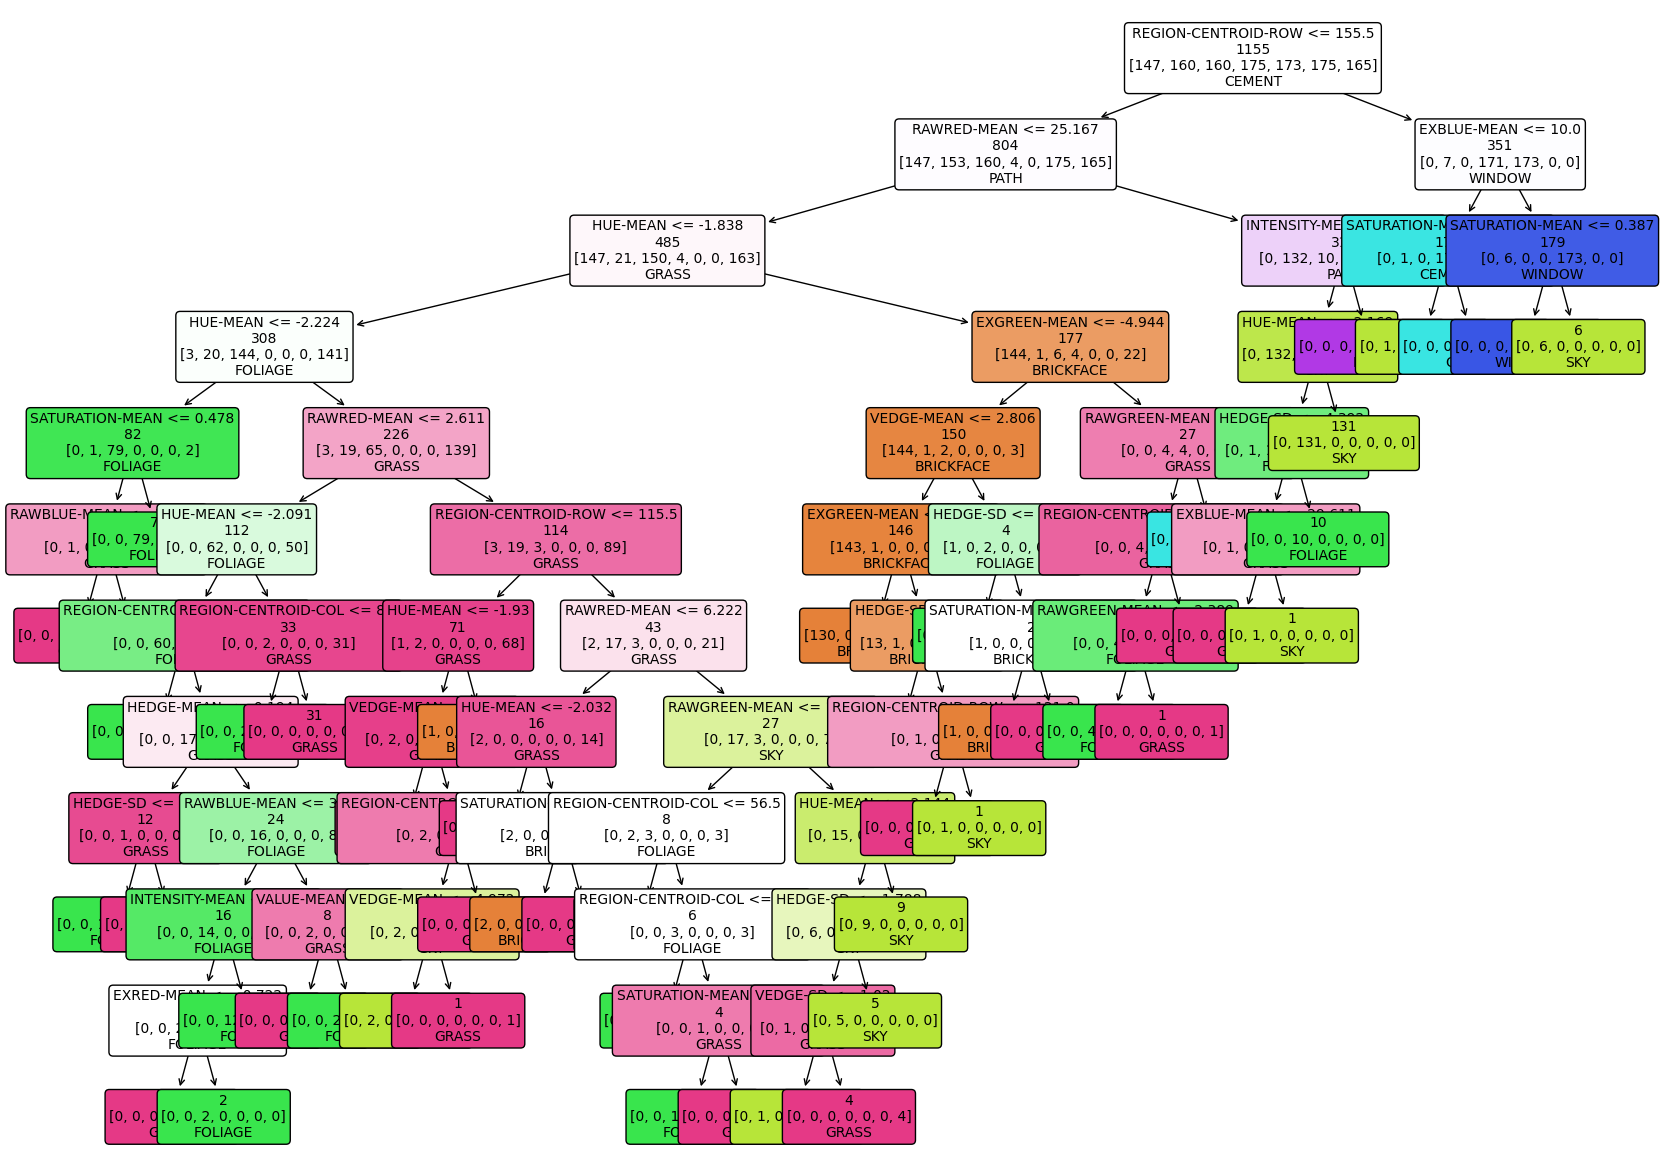

In [ ]:
#plot D tree

plt.figure(figsize=(20,15))
tree.plot_tree(ftree,fontsize = 10,feature_names = feature_names, class_names =["BRICKFACE","SKY","FOLIAGE","CEMENT","WINDOW","PATH","GRASS"],label = 'none',filled=True,impurity=False, rounded=True)

In [ ]:
#menampilkan fitur penting

fi = ftree.feature_importances_
for fi_val,f_name in zip(fi,feature_names):
  print("%4.2f %s"% (fi_val,f_name))

0.01 REGION-CENTROID-COL
0.31 REGION-CENTROID-ROW
0.00 REGION-PIXEL-COUNT
0.00 SHORT-LINE-DENSITY-5
0.00 SHORT-LINE-DENSITY-2
0.01 VEDGE-MEAN
0.00 VEDGE-SD
0.00 HEDGE-MEAN
0.01 HEDGE-SD
0.10 INTENSITY-MEAN
0.22 RAWRED-MEAN
0.00 RAWBLUE-MEAN
0.01 RAWGREEN-MEAN
0.00 EXRED-MEAN
0.11 EXBLUE-MEAN
0.03 EXGREEN-MEAN
0.00 VALUE-MEAN
0.02 SATURATION-MEAN
0.16 HUE-MEAN


In [ ]:
#Menghitung jumlah daun di tree
ftree.get_n_leaves()

49

In [ ]:
#pruned tree

p_tree = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 3)
p_tree = p_tree.fit(X_train,y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print("Test set accuract %4.2f"% (acc))

Test set accuract 0.41


[Text(0.6, 0.8333333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.4, 0.5, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.2, 0.16666666666666666, '485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.6, 0.16666666666666666, '319\n[0, 132, 10, 0, 0, 175, 2]\nPATH'),
 Text(0.8, 0.5, '351\n[0, 7, 0, 171, 173, 0, 0]\nWINDOW')]

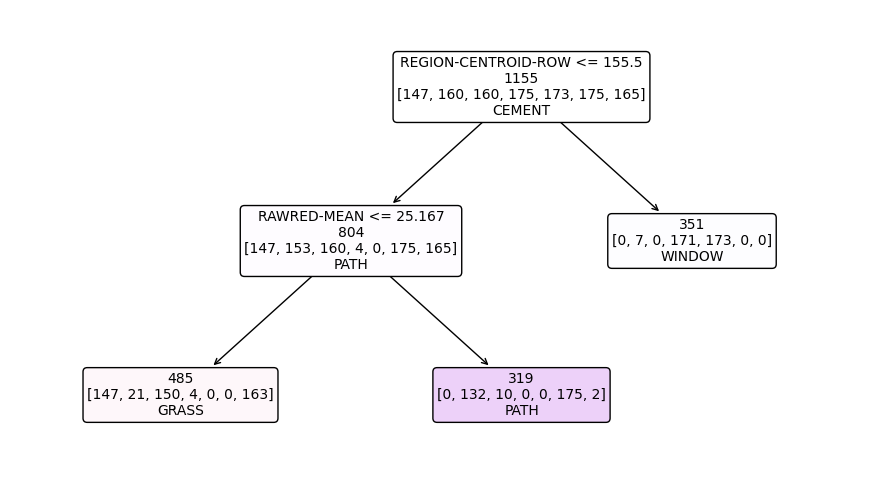

In [ ]:
#plot D-tree
plt.figure(figsize=(11,6))

tree.plot_tree(p_tree,fontsize = 10,feature_names = feature_names, class_names =["BRICKFACE","SKY","FOLIAGE","CEMENT","WINDOW","PATH","GRASS"],label = 'none',filled=True,impurity=False, rounded=True)

In [ ]:
#menampilkan fitur penting

fi = p_tree.feature_importances_

for fi_val,f_name in zip(fi,feature_names):
  print("%4.2f %s"% (fi_val,f_name))

0.00 REGION-CENTROID-COL
0.61 REGION-CENTROID-ROW
0.00 REGION-PIXEL-COUNT
0.00 SHORT-LINE-DENSITY-5
0.00 SHORT-LINE-DENSITY-2
0.00 VEDGE-MEAN
0.00 VEDGE-SD
0.00 HEDGE-MEAN
0.00 HEDGE-SD
0.00 INTENSITY-MEAN
0.39 RAWRED-MEAN
0.00 RAWBLUE-MEAN
0.00 RAWGREEN-MEAN
0.00 EXRED-MEAN
0.00 EXBLUE-MEAN
0.00 EXGREEN-MEAN
0.00 VALUE-MEAN
0.00 SATURATION-MEAN
0.00 HUE-MEAN


> **Analisis** : \\

> Pada hasil pertama dari decision tree pada dataset segmentasi, terlihat bahwa terdapat total 49 daun keputusan dengan 11 fitur yang dianggap penting, dan akurasi mencapai 0.95. Ini menunjukkan bahwa model decision tree awal memiliki kemampuan yang sangat baik dalam mengklasifikasikan data. Namun, pada langkah selanjutnya, yaitu pruning (pemangkasan), pohon keputusan diubah (gambar pohon kedua), dengan tujuan menghilangkan cabang-cabang yang dianggap tidak berguna. Hasil dari pruning ini adalah penurunan drastis dalam akurasi menjadi 0.41, dengan hanya 2 fitur yang dianggap penting.

> Ini mengindikasikan bahwa pemangkasan pohon keputusan pada kasus ini sebenarnya merusak kinerja model, karena menghasilkan model yang jauh lebih buruk dalam mengklasifikasikan data. Hal ini mungkin terjadi karena pruning menghilangkan beberapa informasi penting yang dibutuhkan oleh model untuk melakukan klasifikasi yang akurat.Dan, pada kasus ini, model decision tree awal dengan 11 fitur penting dapat dianggap lebih baik daripada model setelah pruning dengan hanya 2 fitur penting, mengingat akurasinya yang jauh lebih tinggi.

# E. Carilah dataset selain dataset yang digunakan dalam praktikum ini kemudian gunakan metode Permutation Feature Importance dan Wrapper. Rangkum hasil, analisis, dan berikan kesimpulan !.

In [ ]:
#import package
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
col_heads = [str(x) for x in range(34)]
col_heads.append('ChestPain')
datawulane = pd.read_csv('Heart.csv')
datawulane.dropna(axis = 0, inplace = True)
datawulane.drop(columns=['Unnamed: 0', 'Thal', 'AHD'], inplace=True)
print(datawulane.shape)
datawulane.head()

(297, 12)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0


In [ ]:
from sklearn import preprocessing
y = datawulane.pop('ChestPain').values
X = datawulane
hati_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = hati_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state=2, test_size=1/2)

In [ ]:
res_df = pd.DataFrame([['All Features',0.0,0.0],
                      ['After PI', 0.0, 0.0],
                      ['After Wrapper', 0.0, 0.0]], columns=['Method', 'X-val', 'Hold-Out'])
res_df.set_index('Method', inplace = True)

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN = kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred, y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

res_df.loc['All Features']['X-val']=cv_acc.mean()
res_df.loc['All Features']['Hold-Out']=acc

print("X_val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold out testig all features: {0:.3f}".format(acc))

X_val on training all features: 0.441
Hold out testig all features: 0.537


In [ ]:
knn_perm = permutation_importance(kNN, X_train, y_train,
                                  n_repeats=10, random_state = 0)

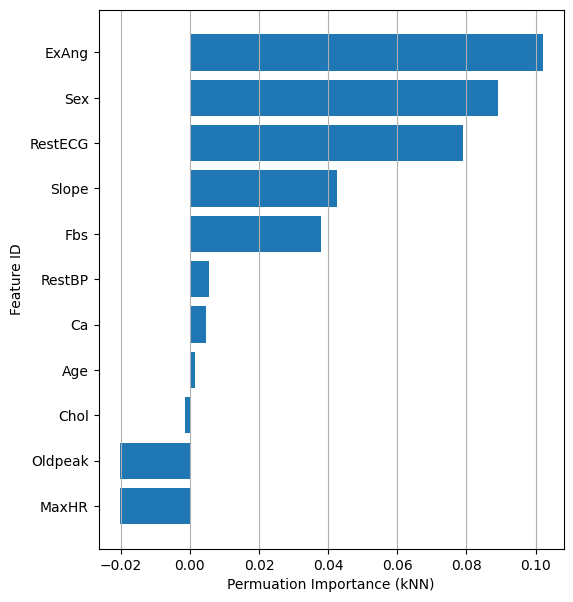

In [ ]:
sorted_idx = knn_perm.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(6,7))
ax.barh(datawulane.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1)
ax.xaxis.grid(True)
ax.set_ylabel("Feature ID")
ax.set_xlabel("Permuation Importance (kNN)")
ax.figure.savefig('PIscores.png')

In [ ]:
mask = knn_perm.importances_mean[sorted_idx]>0

In [ ]:
PI_features = datawulane.columns[sorted_idx][mask]

In [ ]:
X_PI = X[PI_features]
print("Permutation IMportance selects", X_PI.shape[1], "features.")
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)
X_PI_train, X_PI_test, y_PI_train, y_PI_test = train_test_split(X_PI_scaled,
                                                                y, random_state =2,
                                                                test_size = 1/2)

Permutation IMportance selects 8 features.


In [ ]:
knnPI = KNeighborsClassifier(n_neighbors=3)
knnPI = knnPI.fit(X_PI_train,y_PI_train)

y_pred_PI = knnPI.predict(X_PI_test)
acc_PI = accuracy_score(y_pred_PI, y_test)
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv=8)

res_df.loc['After PI']['X-val']=cv_acc_PI.mean()
res_df.loc['After PI']['Hold-Out']=acc_PI

print("X_val on training PI features: {0:.3f}".format(cv_acc_PI.mean()))
print("Hold out testig PI features: {0:.3f}".format(acc_PI))

X_val on training PI features: 0.448
Hold out testig PI features: 0.523


In [ ]:
#wrapper dengan feature backward elimination

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
sfs = SequentialFeatureSelector(knn,n_features_to_select="auto",direction ="backward", cv = 10, tol = 0.00001)

sfs.fit(X_PI_train,y_train)
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test = sfs.transform(X_PI_test)

knnPIW= KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)
knnPIW.score(X_PI_W_test,y_PI_test)

(148, 7)


0.5033557046979866

In [ ]:
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train,y_PI_train)

y_pred_PIW = knnPIW.predict(X_PI_W_test)
acc_PIW = accuracy_score(y_pred_PIW, y_PI_test)
cv_acc_PIW = cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8)

res_df.loc['After Wrapper']['X-val']=cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out']=acc_PIW

print("X_val on training PI features: {0:.3f}".format(cv_acc_PIW.mean()))
print("Hold out testig PI features: {0:.3f}".format(acc_PIW))

X_val on training PI features: 0.475
Hold out testig PI features: 0.503


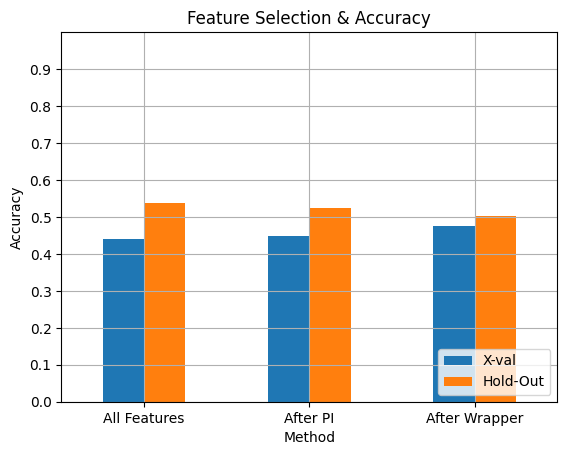

In [ ]:
ax = res_df.plot.bar(rot=0)
ax.set_ylabel("Accuracy")
ax.set_title("Feature Selection & Accuracy")
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1,0.1))
ax.legend(loc='lower right')
ax.grid(True)
ax.figure.savefig("PI+Wrapper.png")

> **Analisis :** \

> Seperti yang kita ketahui pada Permutation Importance akan memilih fitur yang paling penting dan cocok dalam klasifikasi. Didapatkan, ada 8 fitur yang dipilih. Kemudian, model KNN dilatih dengan 3 neighbor terdekat, dan pada pengujian data test, akurasi mencapai sekitar 0.523. \\

> Selanjutnya, dilakukan seleksi fitur lanjutan dengan Sequential Feature Selector yang memilih fitur secara berurutan dengan cross-validation. Setelah seleksi fitur ini menggunakan warpper ternyata hanya 7 fitur yang dipertahankan. Model KNN kembali dilatih dengan 3 neighbor terdekat, tetapi akurasi pada data uji setelah seleksi fitur lanjutan hanya sekitar 0.503 atau lebih kecil dibandingkan nilai sebelumnya.

> Kesimpulannya bahwa dengan Permutation Importance kita dapat meningkatkan akurasi model KNN pada data test dibandingkan dengan menggunakan semua fitur. Lalu, pemilihan fitur dengan Sequential Feature Selector tidak memberikan peningkatan dibandingkan dengan pemilihan fitur menggunakan Permutation Importance. Maka, fitur Permutation Importance lebih efektif dalam meningkatkan performa model KNN.




